In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
# import dataset
df=pd.read_csv("datasets/cardata.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Selling_Price is the column trying to predict

In [6]:
df.shape

(301, 9)

In [7]:
# getting overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# print unique value of categorical varaibles which has object data type
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Owner'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']


In [11]:
# remove indentifiers
df_required=df.drop("Car_Name", axis=1)

In [14]:
# Age of car
df_required["Present_Year"]=2021
df_required.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [15]:
df_required["Age_Year"]=df_required["Present_Year"]-df_required["Year"]
df_required.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Age_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [18]:
df_required.drop(["Present_Year", "Year"],axis=1, inplace = True)
df_required.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


We need to encode data into the form of 0 and 1 to feed it into algorithm, so:

In [20]:
df_required=pd.get_dummies(df_required, drop_first=True)
df_required.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [22]:
# extracting x variables
df_required_x=df_required.drop("Selling_Price", axis=1)

In [24]:
# Outlier analysis:
from scipy.stats import zscore
df_required['Zscore_SP']=zscore(df_required.Selling_Price)
df_required[(df_required.Zscore_SP>3.0) | (df_required.Zscore_SP<-3.0)]


,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Zscore_SP
51,23.00,30.61,40000,0,6,1,0,0,0,3.613993
59,19.99,35.96,41000,0,7,1,0,0,0,3.020815
63,23.50,35.96,47000,0,6,1,0,0,0,3.712527
64,33.00,36.23,6000,0,4,1,0,0,0,5.584684
82,23.00,25.39,15000,0,4,1,0,0,0,3.613993
86,35.00,92.60,78000,0,11,1,0,0,1,5.978822
93,23.00,30.61,40000,0,6,1,0,0,0,3.613993
96,20.75,25.39,29000,0,5,1,0,0,0,3.170587


stores Zscore greater than 3.0 and less than -3.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1fb334cfc70>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb334e6370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb334cf910>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb334e6a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb334e6d30>],
 'means': []}

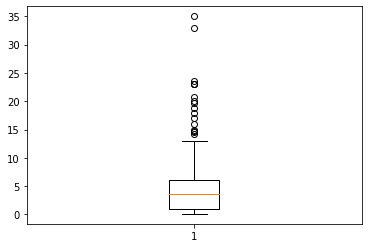

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(df_required["Selling_Price"])

Here, circles represents the outliers

Existence of high corelation between independent variables is called Multi Collinearity. Presence of multi collinearity can distabilize regression models. So it is better to identify multi collinearity and remove them from data appropiately. Here, I am using figure and heat map function in matplotlib library to plot correlation between independent variables in a heatmap.

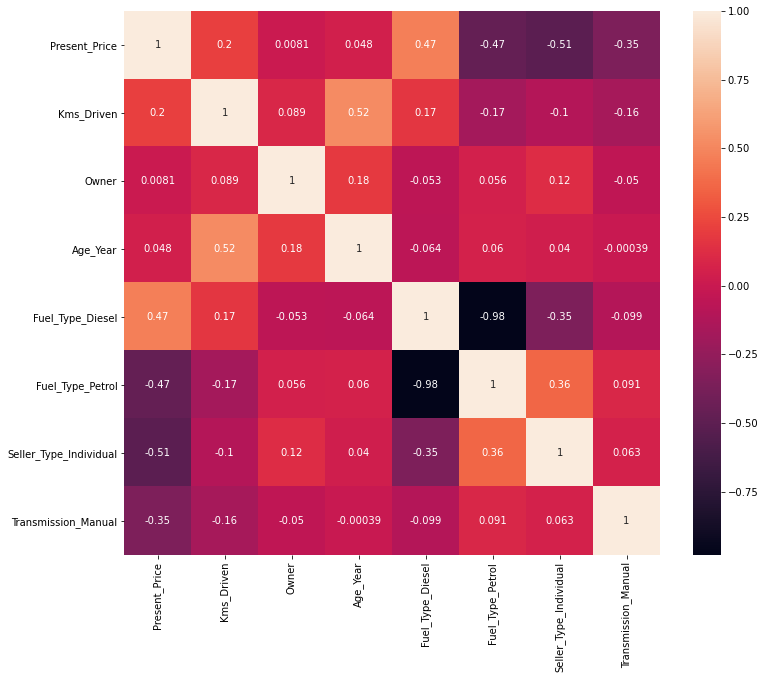

In [26]:
plt.figure(figsize=(12, 10))
sn.heatmap(df_required_x.corr(), annot=True)

If we look at this heatmap we can see one case where correlation number is high between fuel_type petrol and fuel_type diesel

In [30]:
# train and test data
import statsmodels.api as sm

In [31]:
x=sm.add_constant(df_required_x)
y=df_required.iloc[:, 0]


In [34]:
import sklearn 
from sklearn.model_selection import train_test_split

In [37]:
train_x, test_x, train_y, test_y=train_test_split(x, y, train_size=0.8, random_state=100)

OLS, ordinary list square method is now used to create model.

In [41]:
# model creation
model_1=sm.OLS(train_y, train_x).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                OLS               Adj. R-squared:      0.897    
Dependent Variable:   Selling_Price     AIC:                 926.0973 
Date:                 2021-06-02 15:06  BIC:                 957.4231 
No. Observations:     240               Log-Likelihood:      -454.05  
Df Model:             8                 F-statistic:         259.9    
Df Residuals:         231               Prob (F-statistic):  6.28e-111
R-squared:            0.900             Scale:               2.6754   
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
const                   5.4695   1.7124  3.1941 0.0016  2.0956  8.8434
Present_Price           0.4101   0.0158 25.9565 0.0000  0.3790  0.4412
Kms_Driven             -0.0000   0.0000 -1.6041 0.1101 -0.0000  0.0000
Owner                   0.5922   0.5964  0.9929 0.3218 -0.5829  1.7673
Age_Year               -0.3891   0.0432 -9.0081 0.0000 -0.4742 -0.3040
Fuel_Type_Diesel        2.4814   1.6635  1.4917 0.1371 -0.7961  5.7589
Fuel_Type_Petrol        0.4708   1.6466  0.2859 0.7752 -2.7734  3.7151
Seller_Type_Individual -1.2325   0.2625 -4.6943 0.0000 -1.7497 -0.7152
Transmission_Manual    -1.5562   0.3217 -4.8373 0.0000 -2.1901 -0.9224
----------------------------------------------------------------------
Omnibus:                31.231        Durbin-Watson:           1.899  
Prob(Omnibus):          0.000         Jarque-Bera (JB):        95.167 
Skew:                   0.507         Prob(JB):                0.000  
Kurtosis:               5.914         Condition No.:           1525401
======================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

Here, what we can see is as a speciality of multiple linear regression, R-squared value ranges from 0 to 1. It explains the variation of y i.e. Selling_Price is explained by the model. The more our R square is better is the model. We can aslo the p-value. P-value less than 0.05, means the variable is significant to the model. Another thing here is to notice is the coefficinet value and its sign which tells how the features influence the selling price. For example, we can say the kilometer driven has negative sign which means inversely proportional i.e. as the kilometer driven goes down, selling price goes up, etc.

In [42]:
# taking only significant variable and storing to new variable
sig_var=["Present_Price", "Age_Year", "Seller_Type_Individual", "Transmission_Manual"]

In [43]:
train_x=train_x[sig_var]

In [44]:
Model_2=sm.OLS(train_y, train_x).fit()

In [46]:
Model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.889    
Dependent Variable:     Selling_Price    AIC:                         1084.4864
Date:                   2021-06-02 15:19 BIC:                         1098.4090
No. Observations:       240              Log-Likelihood:              -538.24  
Df Model:               4                F-statistic:                 483.4    
Df Residuals:           236              Prob (F-statistic):          2.18e-112
R-squared (uncentered): 0.891            Scale:                       5.2819   
--------------------------------------------------------------------------------
                             Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------------------
Present_Price                0.5507    0.0175  31.4102  0.0000   0.5162   0.5852
Age_Year                    -0.1750    0.0430  -4.0663  0.0001  -0.2597  -0.0902
Seller_Type_Individual      -0.1354    0.3419  -0.3962  0.6923  -0.8090   0.5381
Transmission_Manual          1.6851    0.3240   5.2011  0.0000   1.0468   2.3234
-------------------------------------------------------------------------------
Omnibus:                  82.725           Durbin-Watson:              2.108   
Prob(Omnibus):            0.000            Jarque-Bera (JB):           1704.163
Skew:                     -0.768           Prob(JB):                   0.000   
Kurtosis:                 15.964           Condition No.:              33      
===============================================================================

"""

Again we can see one variable called Seller_Type_Individual is not significant so removing it.

In [47]:
sig_var_2=["Present_Price", "Age_Year", "Transmission_Manual"]

In [48]:
train_x=train_x[sig_var_2]

In [49]:
Model_3=sm.OLS(train_y, train_x).fit()

In [50]:
Model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.890    
Dependent Variable:     Selling_Price    AIC:                         1082.6460
Date:                   2021-06-02 15:22 BIC:                         1093.0879
No. Observations:       240              Log-Likelihood:              -538.32  
Df Model:               3                F-statistic:                 646.8    
Df Residuals:           237              Prob (F-statistic):          8.51e-114
R-squared (uncentered): 0.891            Scale:                       5.2631   
---------------------------------------------------------------------------------
                         Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------------------
Present_Price            0.5536     0.0159   34.9277   0.0000    0.5224    0.5849
Age_Year                -0.1809     0.0403   -4.4944   0.0000   -0.2602   -0.1016
Transmission_Manual      1.6603     0.3173    5.2325   0.0000    1.0352    2.2853
-------------------------------------------------------------------------------
Omnibus:                  85.855           Durbin-Watson:              2.110   
Prob(Omnibus):            0.000            Jarque-Bera (JB):           1797.902
Skew:                     -0.820           Prob(JB):                   0.000   
Kurtosis:                 16.308           Condition No.:              29      
===============================================================================

"""

Model validation should be done now. The reason behind it is, we perform multiple linear regression under some assumptions. If this assumption is not satisfied, model cannot be reliable. 

<Figure size 576x432 with 0 Axes>

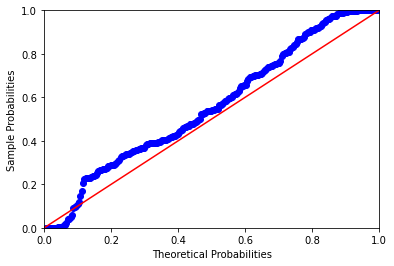

In [53]:
# normal distribution residuals for checking assumption 
# If the residuals are normally distributed the the blue line and red line should be close enough
probplot=sm.ProbPlot(Model_3.resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.show()

In [54]:
# Predictions
pred=Model_3.predict(test_x[sig_var_2])

In [55]:
pred

199   -0.551306
201    3.429512
111    1.586188
125    0.458263
46     2.920311
         ...   
283    7.288676
104    1.750483
255    2.994081
19     4.088343
200   -0.638092
Length: 61, dtype: float64

In [57]:
# Measuring R2
from sklearn import metrics
np.round(metrics.r2_score(pred, test_y), 2)

0.49

Here we can see R2 decresed drastically. This means model need to be improved

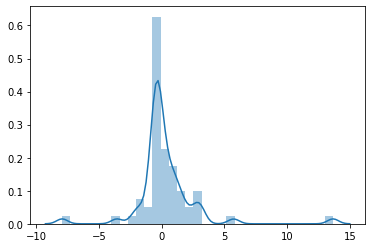

In [58]:
# distribution plot between predicted value and actual value
sn.distplot(test_y-pred)

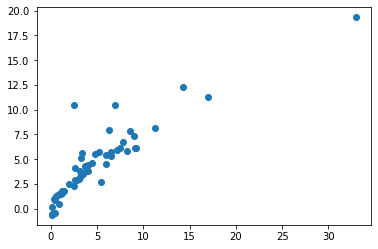

In [59]:
plt.scatter(test_y, pred)

We can see graph is linear but when the value increses accuracy goes down.